# Método de Euler Implícito

A forma do _Método de Euler Implícito_ (MEI) é similar àquela do MEE, exceto por uma característica distintiva. Em vez de a inclinação utilizada para avanço ser tomada em $t_i$, ela é tomada em $t_{i+1}$. Isto é, o processo numérico avança com a estimativa $f(t_{i+1},y_{i+1})$ e não $f(t_i,y_i)$. O fato de usar esta inclinação ainda desconhecida é a razão de o método ser denominado "implícito". O esquema numérico resultante é o processo iterativo: 

\begin{align*}
w_0 &= \alpha \\
w_{i+1} &= w_i + h f(t_{i+1},w_{i+1}) \ \ i = 0,1,\dots,N-1.
\end{align*}

Note, entretanto, que $w_{i+1}$ aparece não apenas no lado esquerdo, mas também no lado direito da equaçõe. Esta incógnita nem sempre é obtenível de modo explícito, isto é, por isolamento. Quando este é o caso, $f$ é linear ou uma função simples, mas, em geral, $f$ é não-linear e dependente do valor futuro $w_{i+1}$.

## Código preditor/corretor


In [1]:
import matplotlib.pyplot as plt

In [2]:
# MEI: preditor/corretor

def euler_impl(t0,tf,y0,h,f,tol):
    
    n = round((tf - t0)/h) + 1
    t = linspace(t0,t0+(n-1)*h,n)
    y = zeros(n)
    y[0] = y0
    
    i = 1
    # iteracoes 
    while i < n:
        
        # preditor (MEE)
        yf = y[i-1] + h*f(t[i-1],y[i-1])
        
        # iteracoes internas (maximo 10)
        count = 0
        diff = 1.0
        while diff > tol and count < 10:
            
            # corretor (MEI)
            yf2 = y[i-1] + h*f(t[i],yf)
            
            diff = abs(yf2-yf)
            yf = yf2
            count += 1
        
        if count >= 10:
            print('Nao convergindo apos 10 passos em t = {0:f}'.format(t[i]))
        
        y[i] = yf2
        i += 1
    
    return t,y

In [3]:
from numpy import linspace, zeros

def euler_expl(t0,tf,y0,h,fun):
    """
    Resolve o PVI y' = f(t,y), t0 <= t <= tf, y(t0) = y0
    com passo h usando o metodo de Euler explicito. 
    
    Entrada: 
        t0  - tempo inicial
        tf  - tempo final 
        y0  - condicao inicial 
        h   - passo 
        fun - funcao f(t,y) (anonima)
        
    Saida:
        t   - nos da malha numerica 
        y   - solucao aproximada
    """
    
    n = round((tf - t0)/h) + 1
    t = linspace(t0,t0+(n-1)*h,n)
    y = linspace(t0,t0+(n-1)*h,n)
    y = zeros((n,))
    
    y[0] = y0

    for i in range(1,n):
        y[i] = y[i-1] + h*f(t[i-1],y[i-1])

    return (t,y)

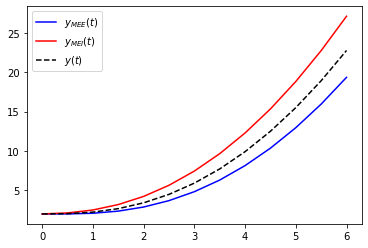

In [4]:
from numpy import log 

# define funcao
f = lambda t,y: (y + t**2 - 2)/(t+1)

# invoca metodo
t0 = 0.0
tf = 6.0
y0 = 2.0
h = 0.5
tol = 1e-3
t,y1 = euler_expl(t0,tf,y0,h,f)
t,y2 = euler_impl(t0,tf,y0,h,f,tol)


# plota funcoes 
yex = t**2 + 2*t + 2 - 2*(t+1)*log(t+1)
plt.plot(t,y1,'b-',label='$y_{MEE}(t)$')
plt.plot(t,y2,'r-',label='$y_{MEI}(t)$')
plt.plot(t,yex,'k--',label='$y(t)$')
plt.legend();

## Método Trapezoidal

In [5]:

def trapezoidal(t0,tf,y0,h,f,tol):
    
    n = round((tf - t0)/h) + 1
    t = linspace(t0,t0+(n-1)*h,n)
    y = zeros(n)
    y[0] = y0
    
    i = 1
    # iteracoes 
    while i < n:
        
        # f(tn,yn)        
        fyt = f(t[i-1],y[i-1])

        # Euler
        yt1 = y[i-1] + h*fyt
                
        # iteracoes internas (maximo 10)
        count = 0
        diff = 1.0
        while diff > tol and count < 10:
            
            # corretor (Trapezoidal)
            yt2 = y[i-1] + 0.5*h*( fyt + f(t[i],yt1) )
            diff = abs(yt2-yt1)
            yt1 = yt2
            count += 1
        
        if count >= 10:
            print('Nao convergindo apos 10 passos em t = {0:f}'.format(t[i]))
        
        y[i] = yt2
        i += 1
    
    return t,y

Nao convergindo apos 10 passos em t = 1.000000


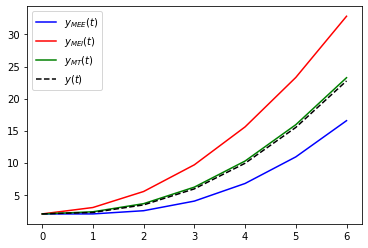

In [6]:
# define funcao
f = lambda t,y: (y + t**2 - 2)/(t+1)

# invoca metodo
t0 = 0.0
tf = 6.0
y0 = 2.0
h = 1.0
tol = 1e-3
t,y1 = euler_expl(t0,tf,y0,h,f)
t,y2 = euler_impl(t0,tf,y0,h,f,tol)
t,y3 = trapezoidal(t0,tf,y0,h,f,tol)


# plota funcoes 
yex = t**2 + 2*t + 2 - 2*(t+1)*log(t+1)
plt.plot(t,y1,'b-',label='$y_{MEE}(t)$')
plt.plot(t,y2,'r-',label='$y_{MEI}(t)$')
plt.plot(t,y3,'g-',label='$y_{MT}(t)$')
plt.plot(t,yex,'k--',label='$y(t)$')
plt.legend();